# Exploratory Data Analysis

## Is there a higher chance of hospital readmission for patients with diabetes?

In [1]:
import pandas as pd
import sketch
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('medical_clean.csv')

## Data Cleaning

In [3]:
# Checking for missing values
missing_values = df.isnull().sum()

# Checking for duplicate rows
duplicate_rows = df.duplicated().sum()

# Checking for any inconsistent categories in 'Diabetes' and 'ReAdmis' columns
unique_diabetes = df['Diabetes'].unique()
unique_readmis = df['ReAdmis'].unique()

print("Missing values:\n",missing_values)
print("Duplicate rows: ", duplicate_rows)
print("Unique values in 'Diabetes' column: ", unique_diabetes)
print("Unique values in 'ReAdmis' column: ", unique_readmis)

Missing values:
 CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0

In [4]:
# Before performing the Chi-square test, let's check the counts of 'Diabetes' and 'ReAdmis' categories
diabetes_counts = df['Diabetes'].value_counts()
readmission_counts = df['ReAdmis'].value_counts()

display(diabetes_counts, readmission_counts)

Diabetes
No     7262
Yes    2738
Name: count, dtype: int64

ReAdmis
No     6331
Yes    3669
Name: count, dtype: int64

## Performing the chi-square test of independence

### Null Hypothesis 

There is no difference in the rates of hospital readmission between patients with diabetes and patients without diabetes.

The code below computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table.

We're using the pd.crosstab() function to create a contingency table, a table in a matrix format displaying the frequency distribution of the variables. In this case, it will show the distribution of 'Diabetes' and 'ReAdmis' variables, i.e., how many patients with and without diabetes were readmitted and not readmitted.

In [5]:
# Create a contingency table
contingency_table = pd.crosstab(df['Diabetes'], df['ReAdmis'])

The chi2_contingency() function returns several values:
- chi2: The test statistic.
- p: The p-value of the test.
- dof: Degrees of freedom.
- expected: The expected frequencies, based on the marginal sums of the table.

In [6]:
# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

The p-value is used in hypothesis testing to help support or reject the null hypothesis. It represents the probability that the results of the test occurred at random. If p is low (less than 0.05), we can reject the null hypothesis and conclude that the observed data are inconsistent with the independence assumption.

In [7]:
# Output the results
print('Chi-square statistic:',chi2,'\np-value,:',p,'\nDegrees of freedom:', dof, '\nExpected frequencies:\n',expected)

Chi-square statistic: 0.07983299478166737 
p-value,: 0.7775238586920562 
Degrees of freedom: 1 
Expected frequencies:
 [[4597.5722 2664.4278]
 [1733.4278 1004.5722]]


The p-value is much larger than 0.05 (commonly used significance level α), indicating that we failed to reject the null hypothesis. Therefore, based on this analysis, there does not appear to be a statistically significant association between having diabetes and hospital readmission.

# Univariate Analysis

Univariate statistics is a statistical analysis method that involves examining only one variable at a time. The term "univariate" refers to the analysis of a single variable or feature. Hence, this technique looks at one feature or variable at a time.

Looking at the continuous variables 'Age' and 'TotalCharge', it can be observed that the patients' ages range from 18 to 89, as shown in the histogram. 

As for the distribution of TotalCharge, it can be noted that there are more charges on the lower and higher ends, with only a few cases falling in between.

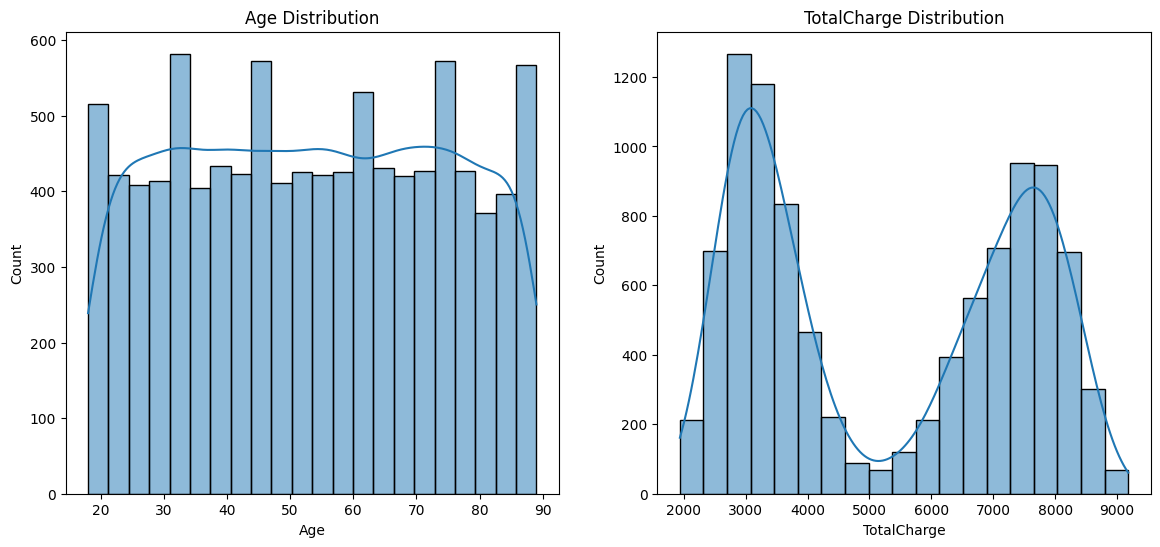

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate analysis for continuous variables: 'Age' and 'TotalCharge'
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df['Age'], kde=True, ax=ax[0])
ax[0].set_title('Age Distribution')

sns.histplot(df['TotalCharge'], kde=True, ax=ax[1])
ax[1].set_title('TotalCharge Distribution')

plt.show()

When analyzing categorical variables, we will examine 'Gender' and 'Marital Status'. The bar graph representing Gender reveals that there are more female patients and a small number of nonbinary patients. The distribution of Marital Status is nearly uniform, with a slightly higher count of widowed and married patients.

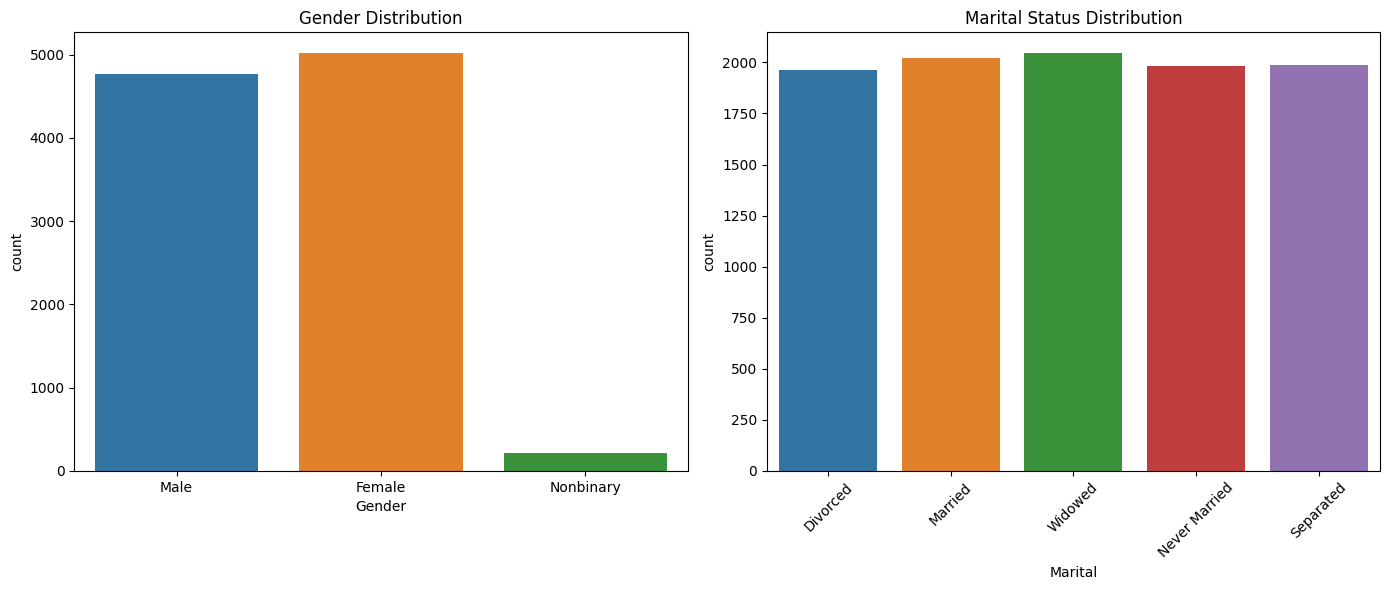

Gender
Female       5018
Male         4768
Nonbinary     214
Name: count, dtype: int64 

Marital
Widowed          2045
Married          2023
Separated        1987
Never Married    1984
Divorced         1961
Name: count, dtype: int64


In [9]:
# Univariate analysis for categorical variables: 'Gender' and 'Marital'
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(x='Gender', data=df, ax=ax[0])
ax[0].set_title('Gender Distribution')

sns.countplot(x='Marital', data=df, ax=ax[1])
ax[1].set_title('Marital Status Distribution')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(df['Gender'].value_counts(),'\n')

print(df['Marital'].value_counts())


# Bivariate Analysis

Bivariate statistics is a statistical analysis that involves two separate variables. It examines the relationship or correlation between the two variables and can identify cause-and-effect scenarios between them. Bivariate analysis is a progression from univariate analysis and allows for exploration of relationships, correlations, and cause-and-effect scenarios. 

When comparing Age and TotalCharge, there appears to be no significant correlation between the two variables, as indicated by the scatter plot.However, when exploring Gender and Marital Status, the stacked bar chart suggests that the distribution of marital statuses is fairly equivalent across all genders. 

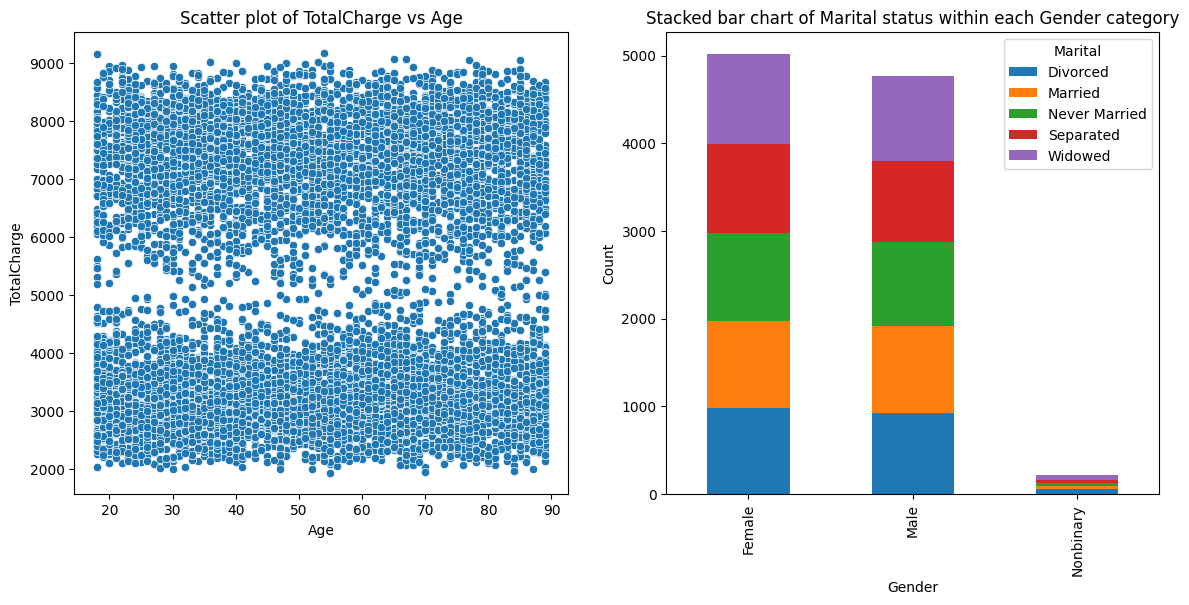

In [10]:
# Bivariate analysis for continuous variables: 'Age' and 'TotalCharge'
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.scatterplot(x='Age', y='TotalCharge', data=df,ax =ax[0] )
ax[0].set_title('Scatter plot of TotalCharge vs Age')


# Bivariate analysis for categorical variables: 'Gender' and 'Marital'
cross_tab = pd.crosstab(df['Gender'], df['Marital'])
cross_tab.plot(kind='bar', stacked=True, ax=ax[1])
ax[1].set_title('Stacked bar chart of Marital status within each Gender category')
plt.ylabel('Count');
